In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import interpolate
from scipy.optimize import fsolve
from functools import partial
from pickle import dump, load
import umap

In [2]:
#Import data
dir_data_for_training = "../../../data/Data_For_Training/"
dir_models = "../models/"
type_of_data_filling = ["em","mice","knn"]
element = type_of_data_filling[2]
result = "DECILE_PUNT_MATEMATICAS"
print('tipo de llenado ',element)

tipo de llenado  knn


In [3]:
resultados = ['DESEMP_INGLES', 'PUNT_MATEMATICAS', 'PUNT_CIENCIAS_SOCIALES', 
            'PUNT_INGLES', 'PUNT_BIOLOGIA', 'PUNT_FILOSOFIA',
 'PUNT_FISICA', 'PUNT_QUIMICA', 'PUNT_LENGUAJE', 'RECAF_PUNT_SOCIALES_CIUDADANAS',
 'RECAF_PUNT_INGLES', 'RECAF_PUNT_LECTURA_CRITICA', 'RECAF_PUNT_MATEMATICAS',
 'RECAF_PUNT_C_NATURALES', 'ESTU_PUESTO', 
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE',
 'NOTA_Z_COLE_CODIGO_ICFES_ESTU_PUESTO',
 'DECILE_PUNT_MATEMATICAS', 'DECILE_PUNT_CIENCIAS_SOCIALES',
 'DECILE_PUNT_INGLES', 'DECILE_PUNT_BIOLOGIA',
 'DECILE_PUNT_FILOSOFIA', 'DECILE_PUNT_FISICA',
 'DECILE_PUNT_QUIMICA', 'DECILE_PUNT_LENGUAJE',
 'DECILE_ESTU_PUESTO']

resultados_2_fit = ['NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA',
 'NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE',
 'NOTA_Z_COLE_CODIGO_ICFES_ESTU_PUESTO',
 'DECILE_PUNT_MATEMATICAS', 'DECILE_PUNT_CIENCIAS_SOCIALES',
 'DECILE_PUNT_INGLES', 'DECILE_PUNT_BIOLOGIA',
 'DECILE_PUNT_FILOSOFIA', 'DECILE_PUNT_FISICA',
 'DECILE_PUNT_QUIMICA', 'DECILE_PUNT_LENGUAJE',
 'DECILE_ESTU_PUESTO']

#Cargamos la información
data = pd.read_csv(dir_data_for_training + "icfes_20141_nn_"+element+".csv")
data = data.set_index("Unnamed: 0")

In [4]:
np.where(data.isna())

(array([], dtype=int64), array([], dtype=int64))

In [5]:
#Dividimos en caracteristicas y resultados
data_results = data[resultados_2_fit]
data_features = data.drop(resultados,axis=1)

In [6]:
def clasify_result(result,values):
    value = 0
    for ii in range(len(values)):
        if(result > values[ii]):
            value += 1
        else:
            break
    return value

cantidad_categorias = 10
intervalos = np.linspace(0,100,cantidad_categorias+1)

for resultado in resultados_2_fit:
    percentiles = np.percentile(data_results[resultado].values,intervalos[1:])
    data_results[resultado+"_"+str(cantidad_categorias)+"_categorias"]  = data_results[resultado].apply(lambda x : 
        clasify_result(x,values=percentiles))

/home/trucupey/.virtualenvs/ICFES-SocioEconomico-u_M2eJSI/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7]:
#Dividimos los datos en test y train y guardamos los datos
x_train, x_test, y_train, y_test = train_test_split(data_features,data_results,test_size=0.2, 
                                                    random_state=42)

x_train_df = pd.DataFrame(data=x_train,columns=data_features.columns.to_list())
y_train_df = pd.DataFrame(data=y_train,columns=data_results.columns.to_list())
y_train_df = y_train_df[resultados_2_fit]
x_test_df = pd.DataFrame(data=x_test,columns=data_features.columns.to_list())
y_test_df = pd.DataFrame(data=y_test,columns=data_results.columns.to_list())
y_test_df = y_test_df[resultados_2_fit]

train_df = pd.concat([x_train_df,y_train_df],axis=1)
test_df = pd.concat([x_test_df,y_test_df],axis=1)

#train_df.to_csv("2014_1_nn_train.csv")
#test_df.to_csv("2014_1_nn_test.csv")

In [8]:
#Escalamos los datos de entrenamiento
scaler_1 = StandardScaler()
scaler_1.fit(x_train) 
x_train_scaled = scaler_1.transform(x_train)

#Guardamos el primer escalador
#name = 'scaler_2014_1_nn_'+element+'_1.pkl'
#dump(scaler_1, open(name, 'wb'))

In [9]:
#perform PCA eliminate linear dependences
threshold = 0.95
explained_variance = []
amount_of_components = []
for k in range(data_features.shape[1]//10):
    pca = PCA(n_components=k*10) #Entrenar la reduccion de dimensionalidad PCA  
    pca.fit(x_train_scaled) # obtener los componentes principales
    amount_of_components.append(k*10)
    explained_variance.append(sum(pca.explained_variance_ratio_))
    print("Componentes ", k*10," explained variance ",sum(pca.explained_variance_ratio_))
    if sum(pca.explained_variance_ratio_) > threshold:
        break
        
#Encontrar la cantidad necesaria de componentes del PCA        
tck = interpolate.splrep(amount_of_components,explained_variance, s=0)
xnew = np.arange(0, max(amount_of_components)+10, 1)
ynew = interpolate.splev(xnew, tck, der=0)

def f(x,value,tck):
    return interpolate.splev(x,tck,der=0)-value

starting_guess = 100
pca_comp = int(fsolve(partial(f,value=threshold,tck=tck),starting_guess))
print("Cantidad de componentes ", pca_comp)

Componentes  0  explained variance  0
Componentes  10  explained variance  0.3011409480063409
Componentes  20  explained variance  0.41395869285262965
Componentes  30  explained variance  0.5089946047685167
Componentes  40  explained variance  0.5868284474879876
Componentes  50  explained variance  0.6528917197132297
Componentes  60  explained variance  0.7107688028221377
Componentes  70  explained variance  0.765318867190006
Componentes  80  explained variance  0.8157401194855246
Componentes  90  explained variance  0.8628497176151783
Componentes  100  explained variance  0.905889878275623
Componentes  110  explained variance  0.9424409104661685
Componentes  120  explained variance  0.9713209253934891
Cantidad de componentes  112


In [10]:
print("Reducción de dimensionalidad con PCA")
# Hacemos la transformación con PCA
pca_trans = PCA(n_components=pca_comp) 
pca_trans.fit(x_train_scaled) 
x_train_pca = pca_trans.transform(x_train_scaled)

# Guardamos el modelo de PCA
#filename = 'pca_2014_1_'+element+'.pkl'
#dump(pca_trans, open(filename, 'wb'))

Reducción de dimensionalidad con PCA


In [11]:
#Escalamos los datos luego de aplicar PCA
scaler_2 = StandardScaler()
scaler_".fit(x_train_pca) 
x_train_pca_scaled = scaler_2.transform(x_train_pca)

#Guardamos el segundo escalador
#name = 'scaler_2014_1_nn_'+element+'_2.pkl'
#dump(scaler_2, open(name, 'wb'))

## Generación de las imagenes

In [23]:
title = {}
title['NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS'] = 'Nota Z puntaje Matemáticas'
title['NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES'] = 'Nota Z puntaje Ciencias Sociales'
title['NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES'] = 'Nota Z puntaje Inglés'
title['NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA'] = 'Nota Z puntaje Biología'
title['NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA'] = 'Nota Z puntaje Filosofía'
title['NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA'] = 'Nota Z puntaje Física'
title['NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA'] = 'Nota Z puntaje Química'
title['NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE'] = 'Nota Z puntaje Lenguaje'
title['NOTA_Z_COLE_CODIGO_ICFES_ESTU_PUESTO'] = 'Nota Z Puesto del estudiante'
title['DECILE_PUNT_MATEMATICAS'] = 'Puntaje Matemáticas'
title['DECILE_PUNT_CIENCIAS_SOCIALES'] = 'Puntaje Ciencias Sociales'
title['DECILE_PUNT_INGLES'] = 'Puntaje Inglés'
title['DECILE_PUNT_BIOLOGIA'] = 'Puntaje Biología'
title['DECILE_PUNT_FILOSOFIA'] = 'Puntaje Filosofía'
title['DECILE_PUNT_FISICA'] = 'Puntaje Física'
title['DECILE_PUNT_QUIMICA'] = 'Puntaje Química' 
title['DECILE_PUNT_LENGUAJE'] = 'Puntaje Lenguaje'
title['DECILE_ESTU_PUESTO'] = 'Puesto del estudiante'

file_name = {}
file_name['NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS'] = 'umap_nota_z_puntaje_matematicas.png'
file_name['NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES'] = 'umap_nota_z_puntaje_ciencias_sociales.png'
file_name['NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES'] = 'umap_nota_z_puntaje_ingles.png'
file_name['NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA'] = 'umap_nota_z_puntaje_biologia.png'
file_name['NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA'] = 'umap_nota_z_puntaje_filosofia.png'
file_name['NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA'] = 'umap_nota_z_puntaje_fisica.png'
file_name['NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA'] = 'umap_nota_z_puntaje_quimica.png'
file_name['NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE'] = 'umap_nota_z_puntaje_lenguaje.png'
file_name['NOTA_Z_COLE_CODIGO_ICFES_ESTU_PUESTO'] = 'umap_nota_z_puesto_del_estudiante.png'
file_name['DECILE_PUNT_MATEMATICAS'] = 'umap_puntaje_matematicas.png'
file_name['DECILE_PUNT_CIENCIAS_SOCIALES'] = 'umap_puntaje_ciencias_sociales.png'
file_name['DECILE_PUNT_INGLES'] = 'umap_puntaje_ingles.png'
file_name['DECILE_PUNT_BIOLOGIA'] = 'umap_puntaje_biologia.png'
file_name['DECILE_PUNT_FILOSOFIA'] = 'umap_puntaje_filosofia.png'
file_name['DECILE_PUNT_FISICA'] = 'umap_puntaje_fisica.png'
file_name['DECILE_PUNT_QUIMICA'] = 'umap_puntaje_quimica.png' 
file_name['DECILE_PUNT_LENGUAJE'] = 'umap_puntaje_lenguaje.png'
file_name['DECILE_ESTU_PUESTO'] = 'umap_puesto_del_estudiante.png'


Reducción de dimensionalidad supervisada de UMAP para  NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS


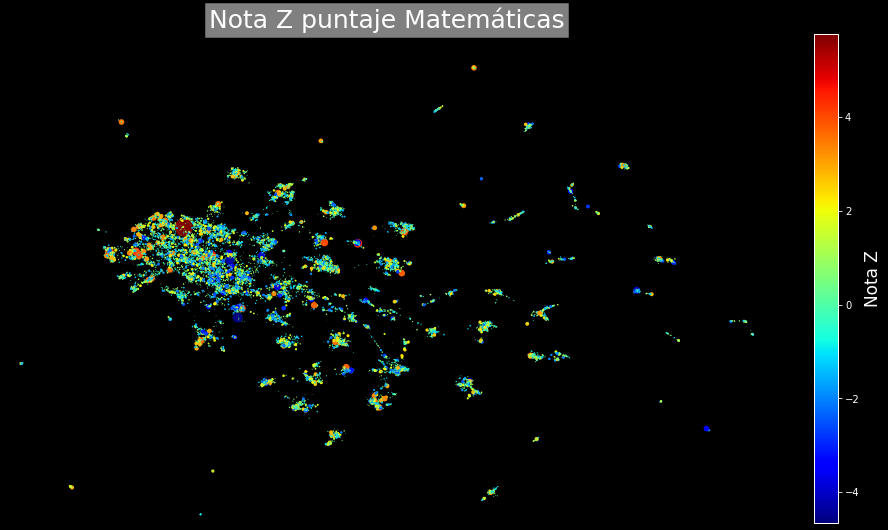

Reducción de dimensionalidad supervisada de UMAP para  NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES


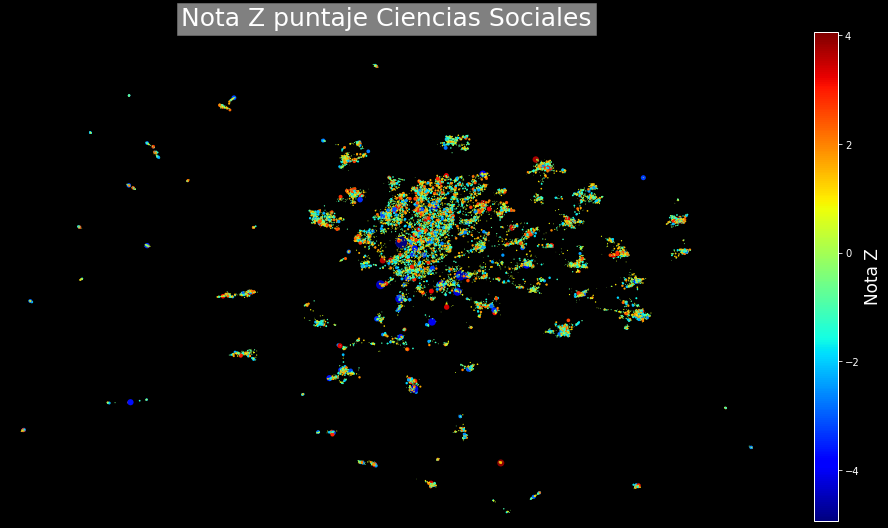

Reducción de dimensionalidad supervisada de UMAP para  NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES


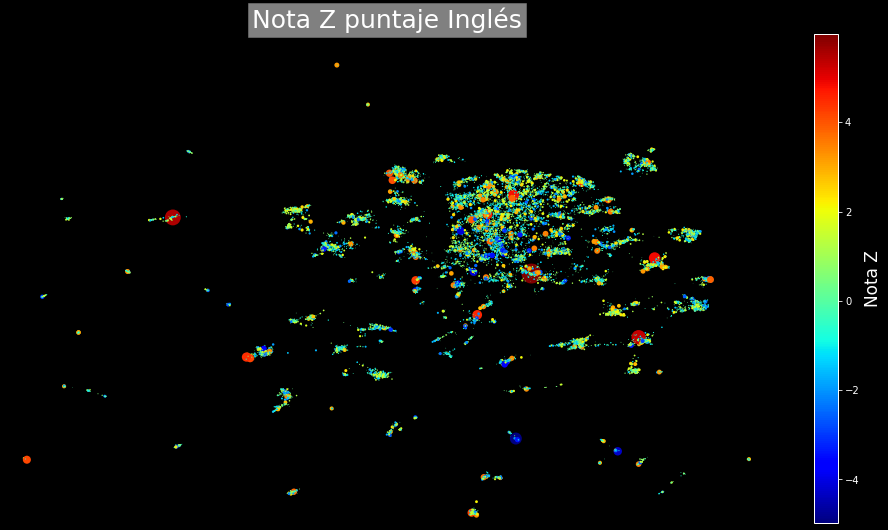

Reducción de dimensionalidad supervisada de UMAP para  NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA


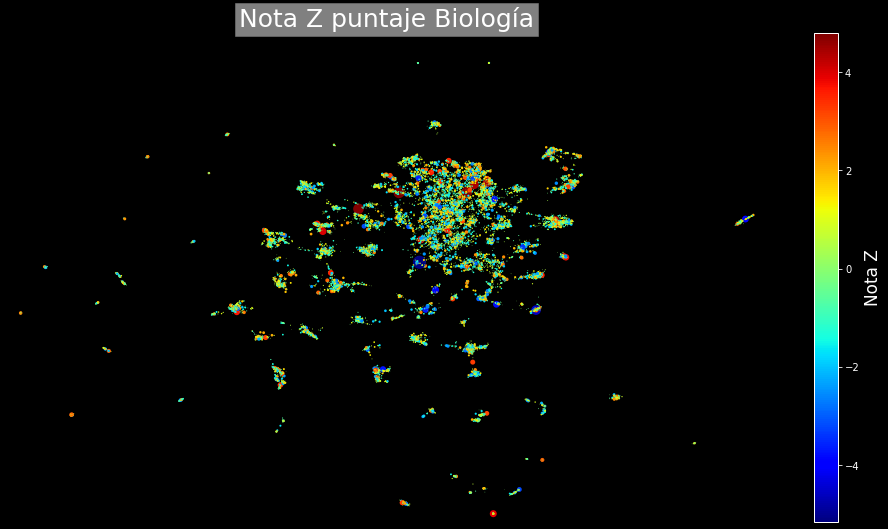

Reducción de dimensionalidad supervisada de UMAP para  NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA


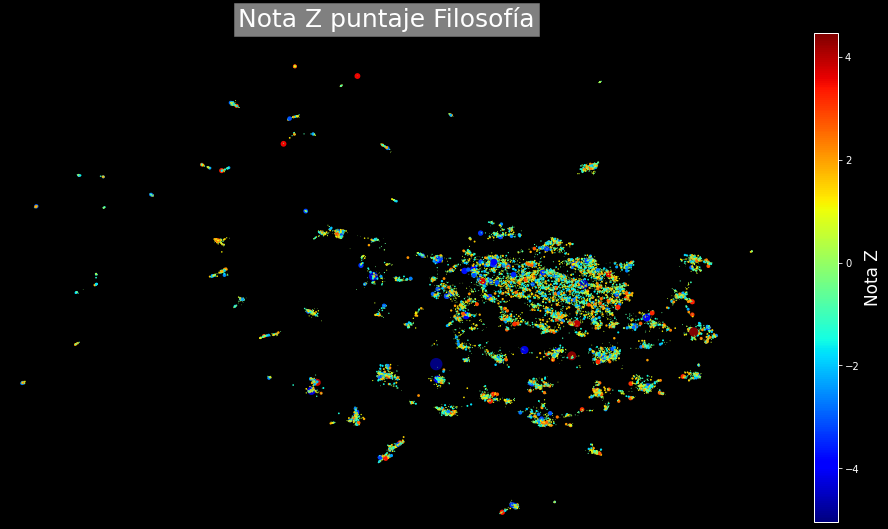

Reducción de dimensionalidad supervisada de UMAP para  NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA


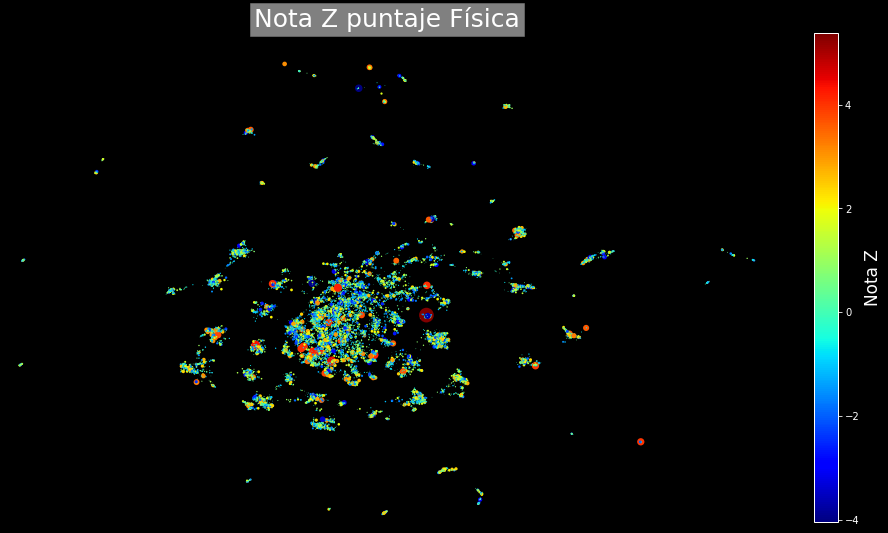

Reducción de dimensionalidad supervisada de UMAP para  NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA


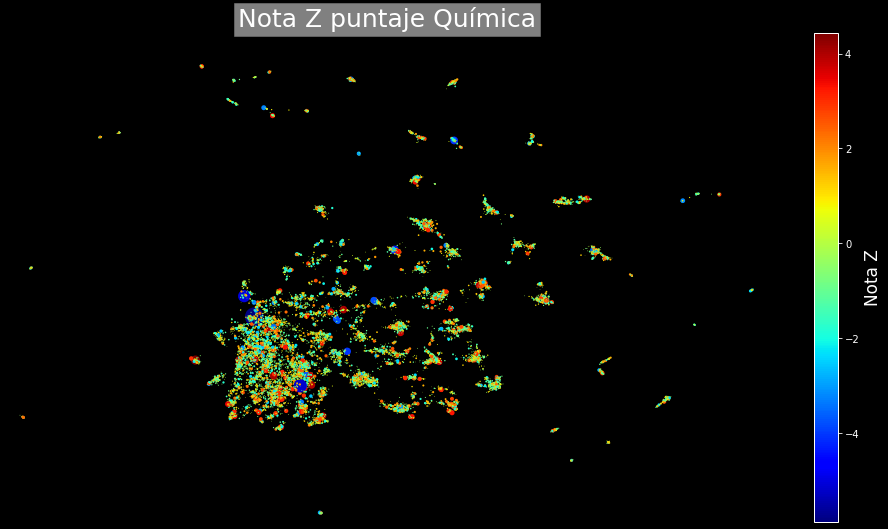

Reducción de dimensionalidad supervisada de UMAP para  NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE


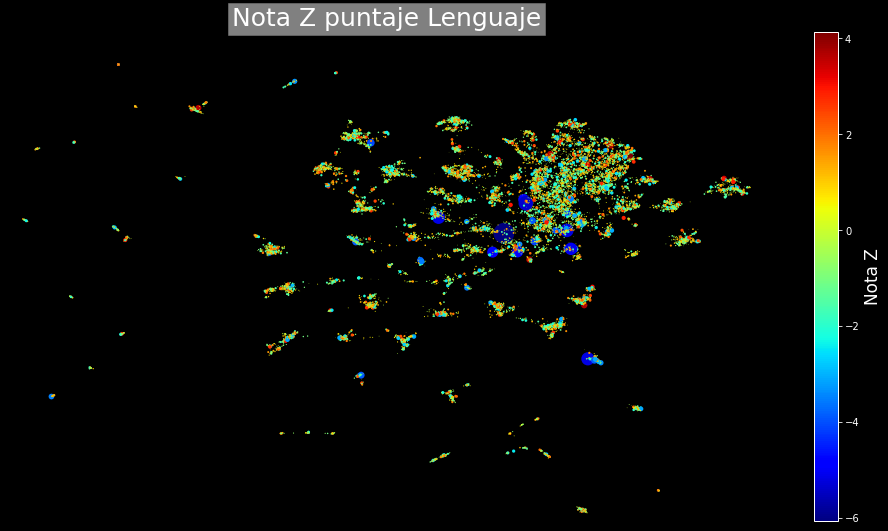

Reducción de dimensionalidad supervisada de UMAP para  NOTA_Z_COLE_CODIGO_ICFES_ESTU_PUESTO


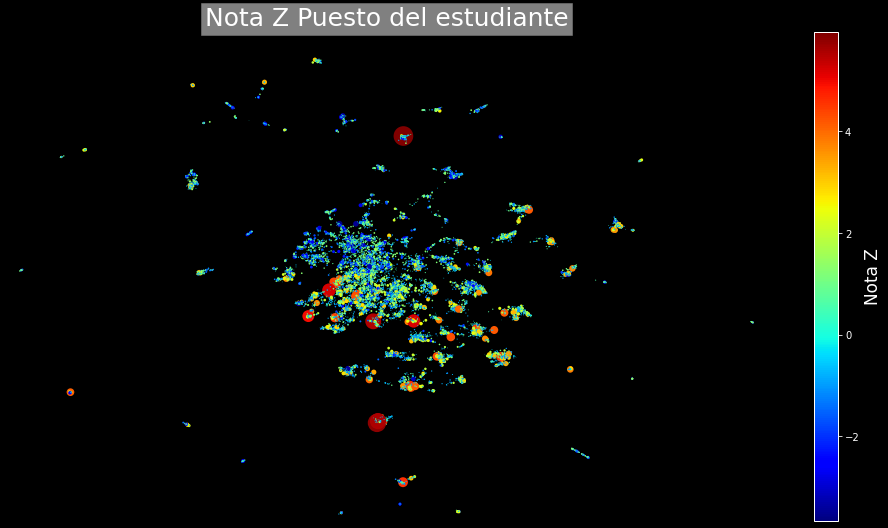

Reducción de dimensionalidad supervisada de UMAP para  DECILE_PUNT_MATEMATICAS


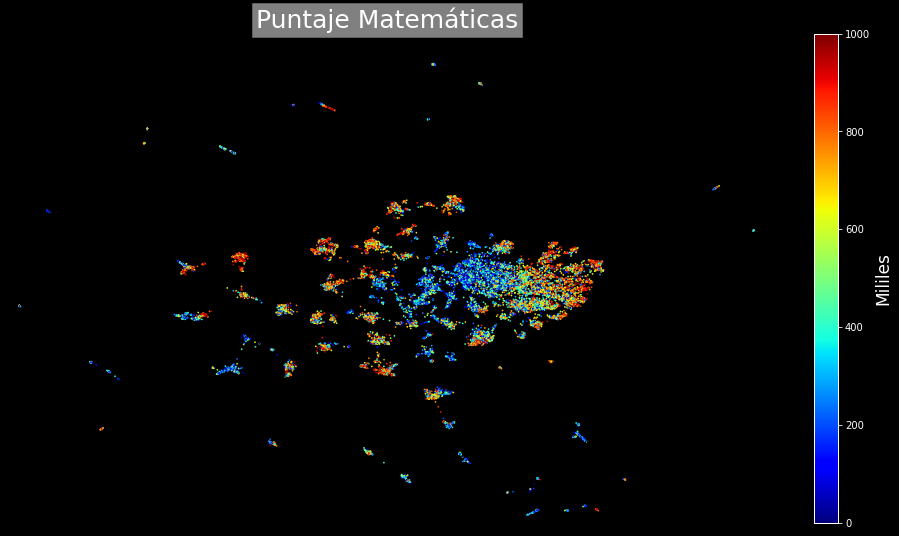

Reducción de dimensionalidad supervisada de UMAP para  DECILE_PUNT_CIENCIAS_SOCIALES


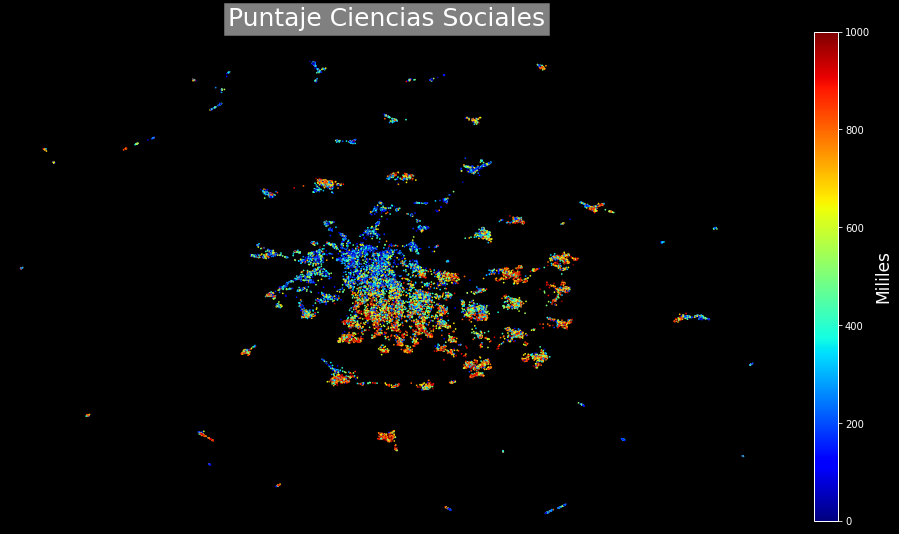

Reducción de dimensionalidad supervisada de UMAP para  DECILE_PUNT_INGLES


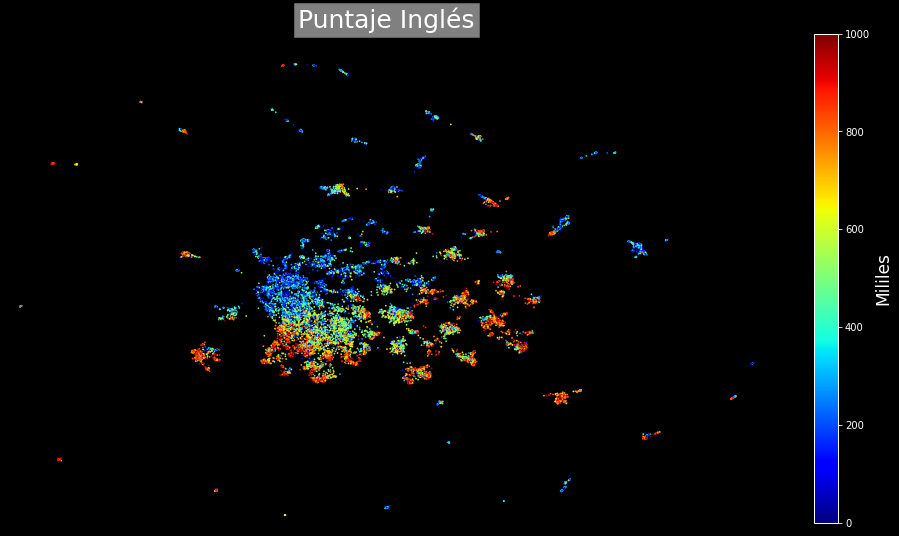

Reducción de dimensionalidad supervisada de UMAP para  DECILE_PUNT_BIOLOGIA


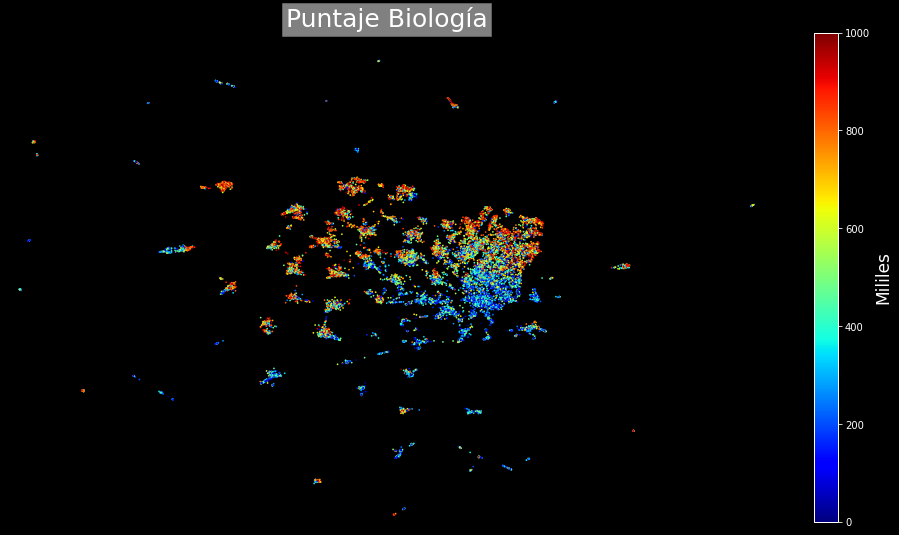

Reducción de dimensionalidad supervisada de UMAP para  DECILE_PUNT_FILOSOFIA


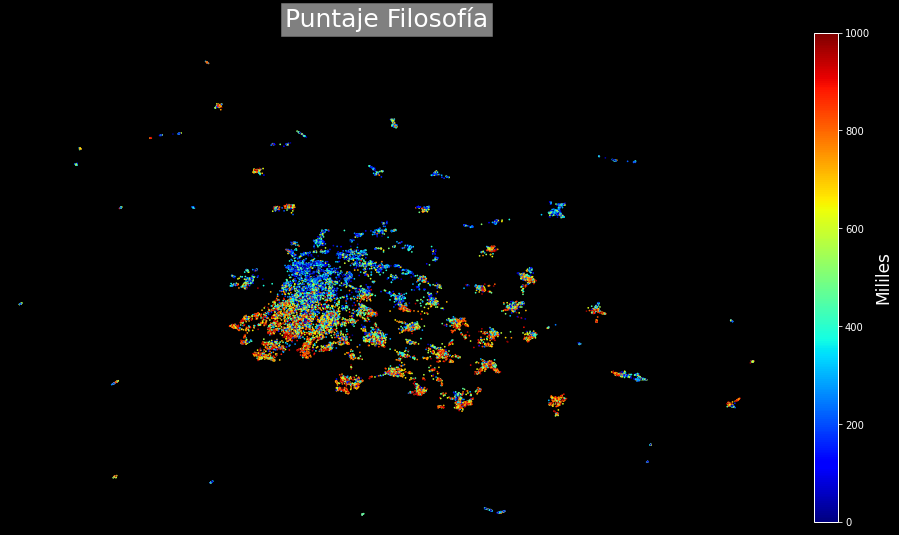

Reducción de dimensionalidad supervisada de UMAP para  DECILE_PUNT_FISICA


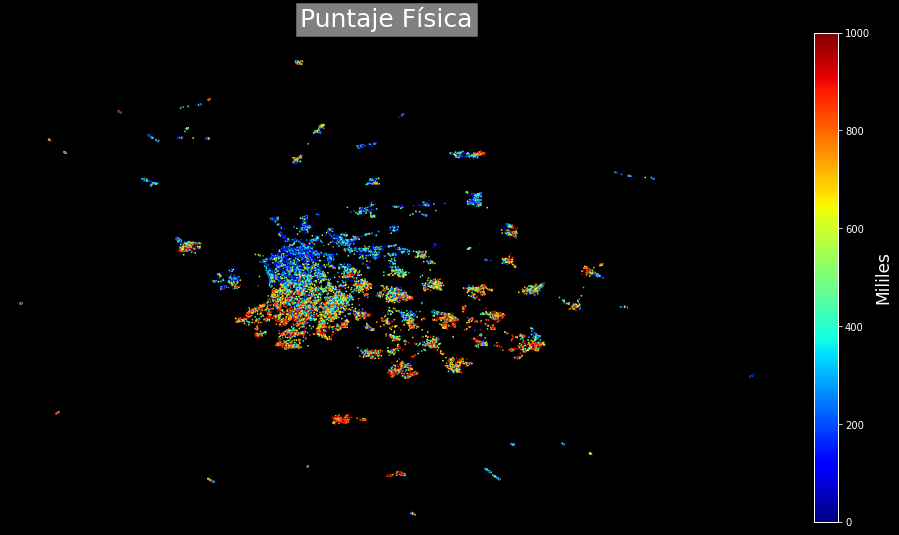

Reducción de dimensionalidad supervisada de UMAP para  DECILE_PUNT_QUIMICA


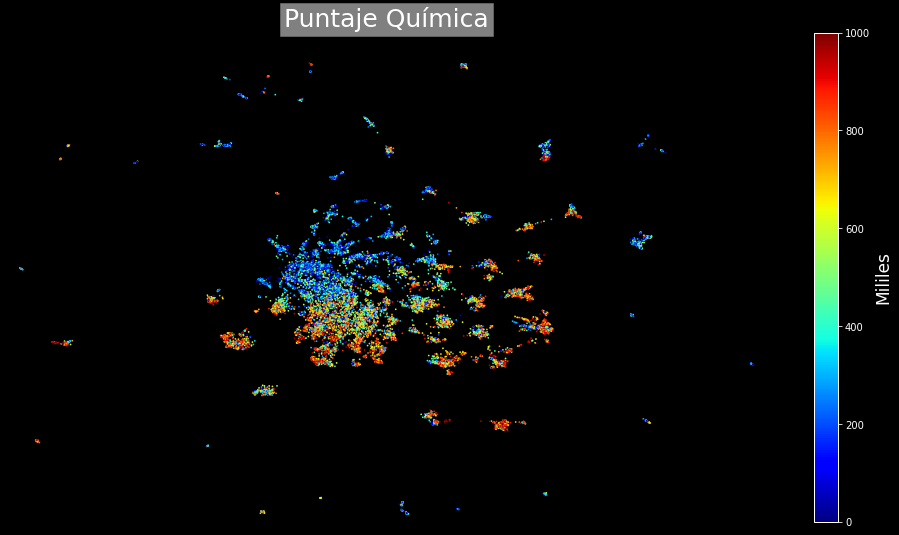

Reducción de dimensionalidad supervisada de UMAP para  DECILE_PUNT_LENGUAJE


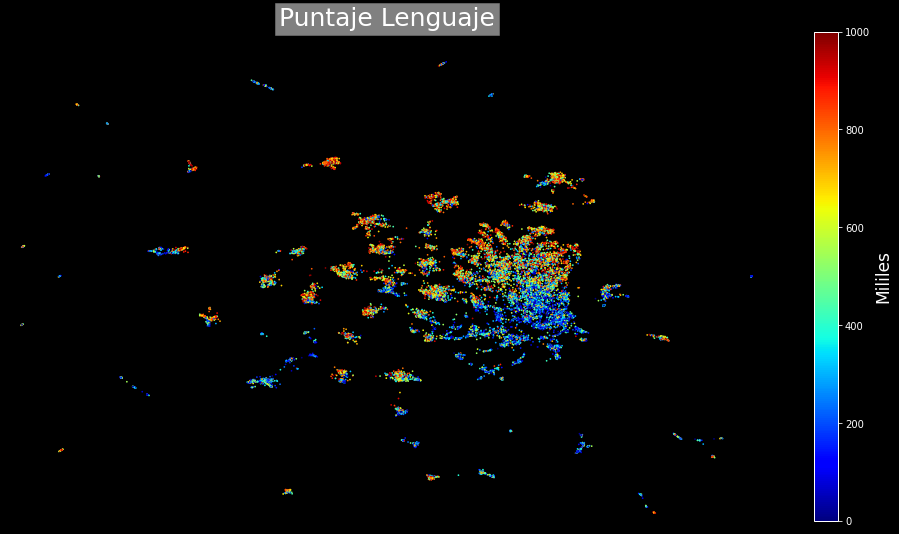

Reducción de dimensionalidad supervisada de UMAP para  DECILE_ESTU_PUESTO


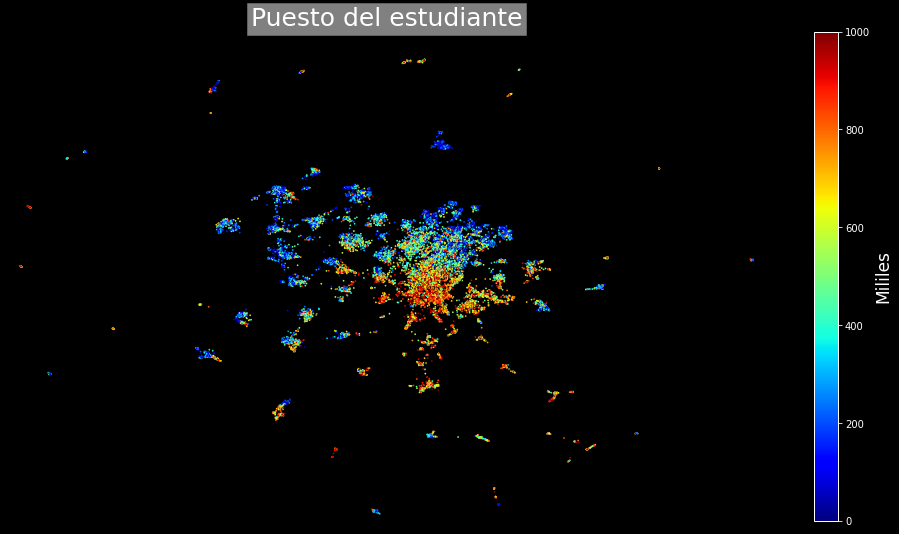

In [47]:
for result in resultados_2_fit:
    #for result in resultados_2_fit:
    print("Reducción de dimensionalidad supervisada de UMAP para ", result)
    #Realizamos reducción de dimensionalidad supervisada con UMAP y guardamos el modelo
    mapper_umap_trained = umap.UMAP(metric="l1",random_state=1,n_neighbors=20,n_components=2,
                    min_dist=0.2).fit(x_train_pca_scaled,y=y_train[result])

    #Generate the graph
    plt.style.use('dark_background')
    fig = plt.figure(figsize=(17,9))
    #fig.patch.set_facecolor('black')
    plt.axis("off")
    
    if 'DECIL' in result:
        plt.scatter(mapper_umap_trained.embedding_[:,0], mapper_umap_trained.embedding_[:,1], 
                s=3, c=y_train[result], linewidth=0, 
                cmap='jet', alpha=1.0)
        cbar = plt.colorbar()
        plt.clim(0, 1000)
        cbar.set_label(label='Mililes', fontsize=17)
    
    else:
        plt.scatter(mapper_umap_trained.embedding_[:,0], mapper_umap_trained.embedding_[:,1], 
                s=np.exp(abs(y_train[result]))-0.8, c=y_train[result], linewidth=0, 
                cmap='jet', alpha=1.0)
        cbar = plt.colorbar()
        cbar.set_label(label='Nota Z', fontsize=17)
    
    plt.xlim(min(mapper_umap_trained.embedding_[:,0]-0.5),max(mapper_umap_trained.embedding_[:,0]+0.5))
    plt.ylim(min(mapper_umap_trained.embedding_[:,1]-0.5),max(mapper_umap_trained.embedding_[:,1]+2))
    plt.title(title[result],fontsize=25,bbox=dict(facecolor='grey', edgecolor='grey'))
    plt.savefig(file_name[result], dpi=500)
    plt.show()